In [1]:
print("Kernel:")
!uname -a

print("\nNvidia Driver Version:")
!nvidia-smi | grep Driver

print("\nCUDA Version:")
!/usr/local/cuda-11.6/bin/nvcc --version

print("\nConda Environment:")
!conda info | grep "active environment"

print("\nPython Version:")
!python --version

print("\nQiskit/cuQuantum Version:")
!pip list | egrep 'qiskit|cuquantum'

Kernel:
Linux padraig-cuda 5.13.0-39-generic #44~20.04.1-Ubuntu SMP Thu Mar 24 16:43:35 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux

Nvidia Driver Version:
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |

CUDA Version:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0

Conda Environment:
     active environment : quantum38

Python Version:
Python 3.8.13

Qiskit/cuQuantum Version:
cuquantum                     22.3.0
cuquantum-python              22.3.0
qiskit                        0.36.0
qiskit-aer                    0.11.0
qiskit-ibmq-provider          0.19.0
qiskit-ignis                  0.7.0
qiskit-terra                  0.20.0


In [2]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi



In [3]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_statevector_gpu'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_density_matrix_gpu'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_unitary_gpu'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [12]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *

sim = AerSimulator(method='statevector', device='GPU',cuStateVec_enable=True) 

qubits = 15
depth=10
shots = 10

circuit = QuantumVolume(qubits, depth, seed=0)
circuit.measure_all()
circuit = transpile(circuit, sim)
result = sim.run(circuit,sim,shots=shots,seed_simulator=12345).result()

metadata = result.to_dict()['results'][0]['metadata']
if 'cuStateVec_enable' in metadata and metadata['cuStateVec_enable']:
    print("cuStateVector is used for the simulation")
print("{0} qubits, Time = {1} sec".format(qubits,result.to_dict()['results'][0]['time_taken']))
counts = result.get_counts()
print(sim)
print(counts)

cuStateVector is used for the simulation
15 qubits, Time = 0.003253731 sec
aer_simulator_statevector_gpu
{'000000000000000': 10}


In [6]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *

sim = AerSimulator(method='statevector', device='CPU', cuStateVec_enable=False)

qubits = 15
depth=10
shots = 10

circuit = QuantumVolume(qubits, depth, seed=0)
circuit.measure_all()
circuit = transpile(circuit, sim)
result = sim.run(circuit,sim,shots=shots,seed_simulator=12345).result()

metadata = result.to_dict()['results'][0]['metadata']
if 'cuStateVec_enable' in metadata and metadata['cuStateVec_enable']:
    print("cuStateVector is used for the simulation")
print("{0} qubits, Time = {1} sec".format(qubits,result.to_dict()['results'][0]['time_taken']))
counts = result.get_counts()
print(sim)
print(counts)

15 qubits, Time = 0.027838836 sec
aer_simulator_statevector
{'011010000111101': 1, '100101001000001': 1, '101100010110011': 1, '011110101110001': 1, '000001110000100': 1, '001101110000100': 1, '101100010101010': 1, '010111001000001': 1, '100100010100111': 1, '001101110011000': 1}


In [14]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *

sim = AerSimulator(method='statevector', device='GPU', cuStateVec_enable=False)

qubits = 15
depth=10
shots = 10

circuit = QuantumVolume(qubits, depth, seed=0)
circuit.measure_all()
circuit = transpile(circuit, sim)
result = sim.run(circuit,sim,shots=shots,seed_simulator=12345).result()

metadata = result.to_dict()['results'][0]['metadata']
if 'cuStateVec_enable' in metadata and metadata['cuStateVec_enable']:
    print("cuStateVector is used for the simulation")
print("{0} qubits, Time = {1} sec".format(qubits,result.to_dict()['results'][0]['time_taken']))
counts = result.get_counts()
print(counts)

15 qubits, Time = 0.002181485 sec
{'011010000111101': 1, '100101001000001': 1, '101100010110011': 1, '011110101110001': 1, '000001110000100': 1, '001101110000100': 1, '101100010101010': 1, '010111001000001': 1, '100100010100111': 1, '001101110011000': 1}


Text(0, 0.5, 'Simulation time (s)')

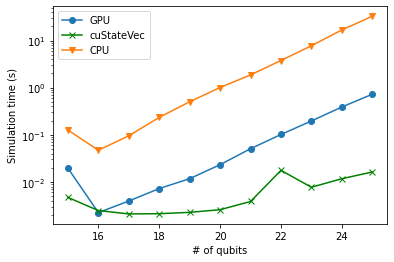

In [16]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *
import matplotlib.pyplot as plt

sim = AerSimulator(method='statevector', device='GPU')
sim_cpu = AerSimulator(method='statevector', device='CPU')

shots = 100
depth=10

time_thrust= []
time_cuStateVec= []
time_cpu= []
qubits_list = []

for qubits in range (15, 26):
    qubits_list.append(qubits)
    circuit = QuantumVolume(qubits, depth, seed=0)
    circuit.measure_all()
    circuit = transpile(circuit, sim)
    result = sim.run(circuit,sim,shots=shots,seed_simulator=12345,fusion_threshold=20,cuStateVec_enable=False).result()
    time_thrust.append(float(result.to_dict()['results'][0]['time_taken']))

    result_cuStateVec = sim.run(circuit,sim,shots=shots,seed_simulator=12345,fusion_threshold=20,cuStateVec_enable=True).result()
    time_cuStateVec.append(float(result_cuStateVec.to_dict()['results'][0]['time_taken']))

    result_cpu = sim_cpu.run(circuit,sim_cpu,shots=shots,seed_simulator=12345,fusion_threshold=20).result()
    time_cpu.append(float(result_cpu.to_dict()['results'][0]['time_taken']))

plt.yscale("log")
plt.plot(qubits_list, time_thrust, marker="o", label='GPU')
plt.plot(qubits_list, time_cuStateVec, 'g', marker="x", label='cuStateVec')
plt.plot(qubits_list, time_cpu, marker="v", label='CPU')
plt.legend()
plt.xlabel("# of qubits")
plt.ylabel("Simulation time (s)")

## AER
https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=20.04&target_type=deb_network

https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html#cuda-major-component-versions__table-cuda-toolkit-driver-versions

https://www.cyberciti.biz/faq/ubuntu-linux-install-nvidia-driver-latest-proprietary-driver/

https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=20.04&target_type=deb_local

https://github.com/Qiskit/qiskit-aer/blob/main/CONTRIBUTING.md

https://github.com/Qiskit/qiskit-aer/blob/c7bef3361c860083bd5982a168f0cee8194080da/src/controllers/aer_controller.hpp#L524


-----

https://github.com/Qiskit/qiskit-aer/blob/main/CONTRIBUTING.md#building-with-gpu-support

qiskit-aer$ python ./setup.py bdist_wheel -- -DAER_THRUST_BACKEND=CUDA -DCUSTATEVEC_ROOT=path_to_cuQuantum

## QSIM

https://gitlab.kitware.com/cmake/cmake/-/issues/21302

## Papers
https://arxiv.org/pdf/2203.08826.pdf